pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -122.38492 to -122.385
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.00121 to -122.000833333
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 46.07428 to 46.0741666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.37527 to 46.3758333333


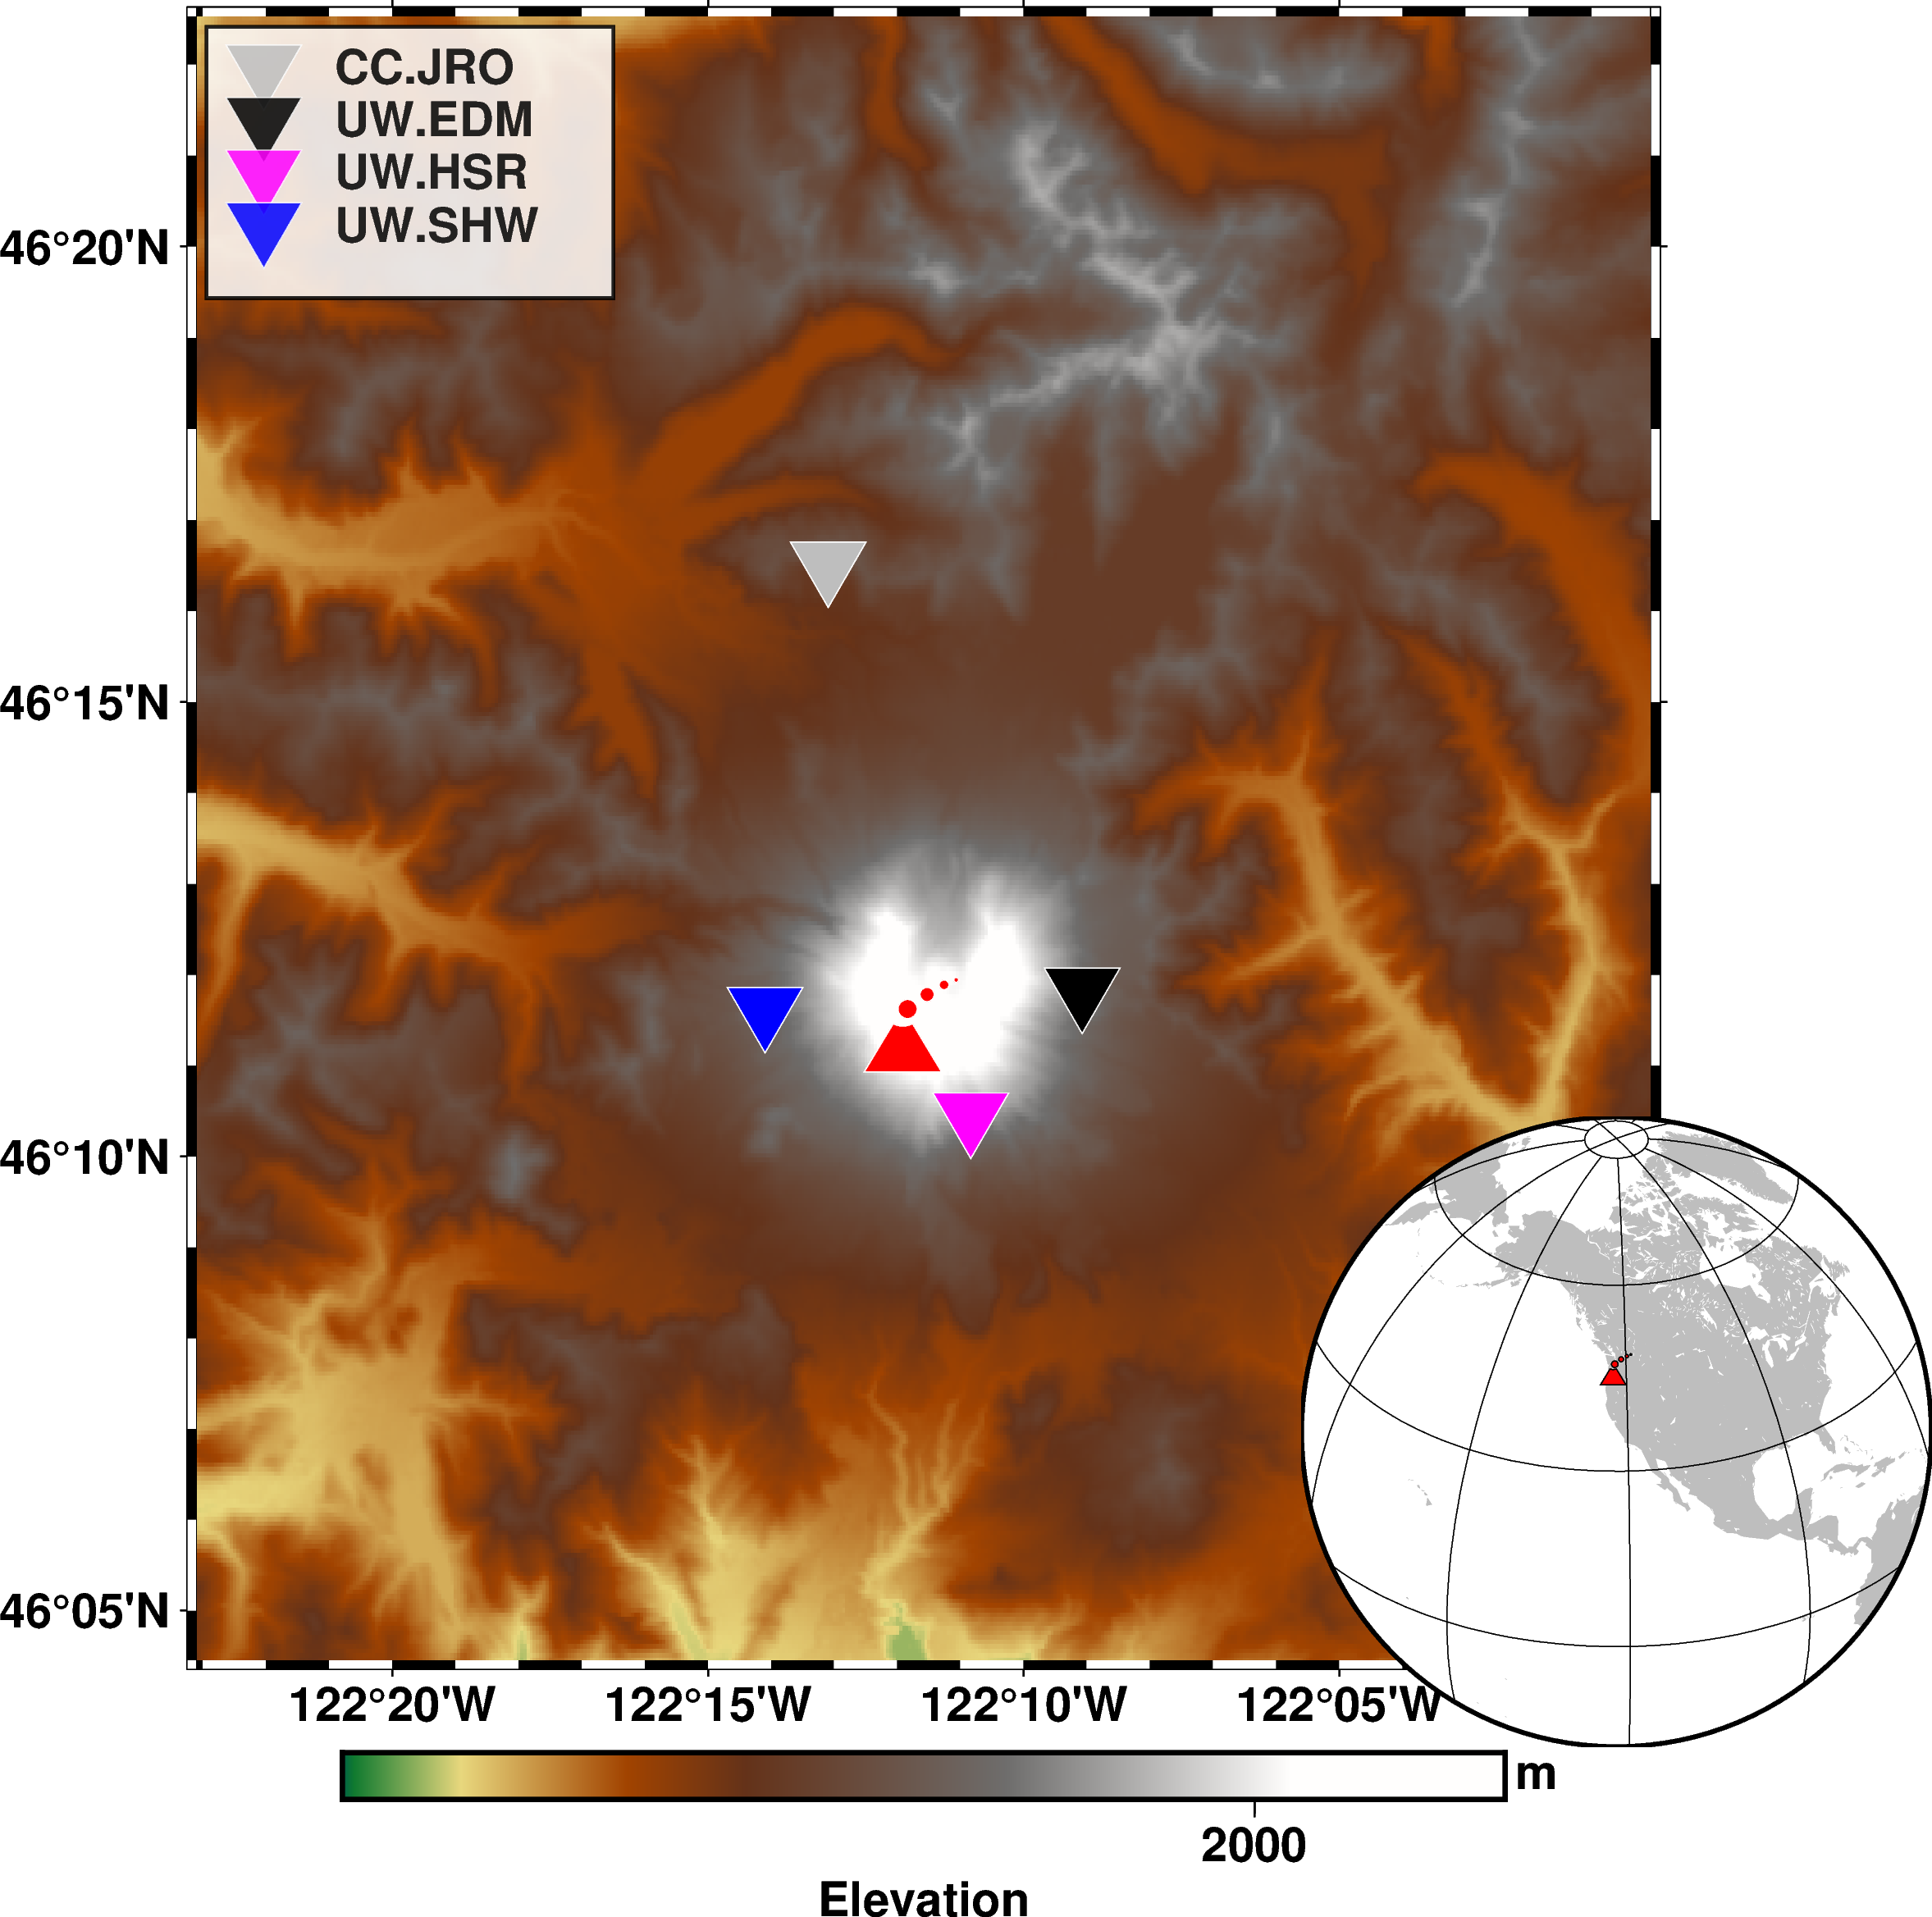

In [18]:
import numpy as np
import pygmt
import pandas as pd


stats = pd.read_csv('stat_locs.txt', sep='|', header=0)
# 2 is lat 3 is lon
region = [
    stats.Longitude.min() - .15,
    stats.Longitude.max() + .15,
    stats.Latitude.min() - .1,
    stats.Latitude.max() + .1,
]

helen = (46.191, -122.196)


pygmt.config(FONT='14p,Helvetica-Bold')

fig = pygmt.Figure()
# relief
grid = pygmt.datasets.load_earth_relief(resolution='03s', region=region)
fig.basemap(region=region, projection="M15c", frame=True)
fig.grdimage(grid=grid, projection="M15c", cmap="geo")

fig.plot(
    x=stats.Longitude[0], y=stats.Latitude[0], style="i0.9c",
    color="grey", pen="white", label=f'{stats.Network[0]}.{stats.Station[0]}')
fig.plot(
    x=stats.Longitude[1], y=stats.Latitude[1], style="i0.9c", color="black",
    pen="white", label=f'{stats.Network[1]}.{stats.Station[1]}')
fig.plot(
    x=stats.Longitude[2], y=stats.Latitude[2], style="i0.9c", color="magenta",
    pen="white", label=f'{stats.Network[2]}.{stats.Station[2]}')
fig.plot(
    x=stats.Longitude[3], y=stats.Latitude[3], style="i0.9c", color="blue",
    pen="white", label=f'{stats.Network[3]}.{stats.Station[3]}')
fig.legend(
    transparency=15, box="+gwhite+p1p", position="jTL+jTL+w4.2c/2.8c+o0.1c")

fig.plot(
    x=helen[1], y=helen[0], style="kvolcano/1c", color="red", pen="white",
    label='Volcanoes')

fig.colorbar(frame=["a2000", "x+lElevation", "y+lm"])

lonmid = (region[0] + region[1])/2
latmid = (region[2] + region[3])/2 - 10
with fig.inset(position="jBR+w6.5c/6.5c+o-2.9c/-.9c"):
    fig.coast(
        projection=f"G{lonmid}/{latmid}/60/6.5c", region="g", frame="g",
        land="gray", water='white')
    fig.plot(
        x=helen[1], y=helen[0], style="kvolcano/0.33c", color="red",
        pen="black", projection=f"G{lonmid}/{latmid}/60/6.5c")

fig.savefig('station_map.png', dpi=400, transparent=True)
fig.show()
